In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import time

In [622]:
from multiprocessing import Pool

#### reading data and preprocessing

In [2]:
aminer = pd.read_csv('preprocessed_data/aminer_computer.csv',index_col=0)

In [97]:
aminer = aminer[(aminer['year'] >= 1950) & (aminer['year'] <= 2022) ]

In [98]:
len(aminer)

2793910

In [3]:
cites = pd.read_csv('preprocessed_data/aminer_oc_oct13.csv')

In [5]:
pub_year_map = dict(zip(aminer['doi'],aminer['year']))

In [12]:
cites1 = cites.copy()

In [10]:
cites.head()

,doi,citing,cited,citing_pub_year
0,10.1007/10703040_16,10.1007/10703040_16,10.1115/1.2817010,1999.0
1,10.1145/3011069,10.1145/3011069,10.1007/bf01201353,2017.0
2,10.1002/jcc.20495,10.1021/acs.jpcc.9b03963,10.1002/jcc.20495,2019.0
3,10.3390/e21030240,10.1515/jnet-2018-0099,10.3390/e21030240,2019.0
4,10.1145/2789168.2790109,10.1145/2999572.2999582,10.1145/2789168.2790109,2016.0


In [13]:
# cites1['citing_pub_year'] = 0
cites1['citing_pub_year'] = cites1['citing'].map(pub_year_map)

In [14]:
cites1['cited_pub_year'] = 0
cites1['cited_pub_year'] = cites1['cited'].map(pub_year_map)

In [9]:
len(cites1)

102291001

In [17]:
len(cites1[cites1['citing_pub_year'].isna()])/len(cites1)

0.4767487611153595

In [19]:
cites1[cites1['citing_pub_year'].isna()]

,doi,citing,cited,citing_pub_year,cited_pub_year
0,10.1007/10703040_16,10.1007/10703040_16,10.1115/1.2817010,NaN,NaN
1,10.1145/3011069,10.1145/3011069,10.1007/bf01201353,NaN,NaN
2,10.1002/jcc.20495,10.1021/acs.jpcc.9b03963,10.1002/jcc.20495,NaN,2006.0
3,10.3390/e21030240,10.1515/jnet-2018-0099,10.3390/e21030240,NaN,NaN
9,10.1016/j.neuroimage.2012.06.064,10.1016/j.nic.2017.09.005,10.1016/j.neuroimage.2012.06.064,NaN,2012.0
...,...,...,...,...,...
102290941,10.1016/j.compchemeng.2012.11.011,10.1016/j.compchemeng.2020.107178,10.1016/j.compchemeng.2012.11.011,NaN,2013.0
102290942,10.1016/j.compchemeng.2020.107178,10.1016/j.compchemeng.2020.107178,10.1016/j.compchemeng.2012.11.011,NaN,2013.0
102290943,10.1016/j.compchemeng.2020.107178,10.1016/j.compchemeng.2020.107178,10.1016/0959-1524(95)95945-a,NaN,NaN
102290944,10.1109/tsg.2015.2478971,10.14260/jemds/2018/500,10.1109/tsg.2015.2478971,NaN,2016.0


In [25]:
cites2 = cites1[~cites1['citing_pub_year'].isna()]

In [26]:
len(cites2)

53523893

In [34]:
cites2.to_csv('preprocessed_data/oc_yrcleaned.csv')

#### get highly cited

In [27]:
cits_counts = cites2.groupby(['cited']).agg({'citing':'count'}).reset_index()

In [28]:
cits_counts.sort_values(by='citing', ascending=False)

,cited,citing
2591179,10.1023/b:visi.0000029664.99615.94,26367
2182854,10.1016/s0019-9958(65)90241-x,13140
4703268,10.1109/tip.2003.819861,13085
3633072,10.1109/4235.996017,12698
5360460,10.1145/1961189.1961199,12604
...,...,...
2954850,10.1071/wf13219,1
2954851,10.1071/wf14005,1
2954853,10.1071/wf14029,1
2954855,10.1071/wf14034,1


In [29]:
top20 = cits_counts[cits_counts['citing'] >= cits_counts['citing'].quantile(0.95)]

In [33]:
top20.sort_values(by='citing', ascending=False)

,cited,citing
2591179,10.1023/b:visi.0000029664.99615.94,26367
2182854,10.1016/s0019-9958(65)90241-x,13140
4703268,10.1109/tip.2003.819861,13085
3633072,10.1109/4235.996017,12698
5360460,10.1145/1961189.1961199,12604
...,...,...
4340859,10.1109/jsac.2016.2520218,28
604483,10.1007/978-3-642-40137-4,28
2265258,10.1016/s0167-8655(01)00177-5,28
3059781,10.1080/014311698215315,28


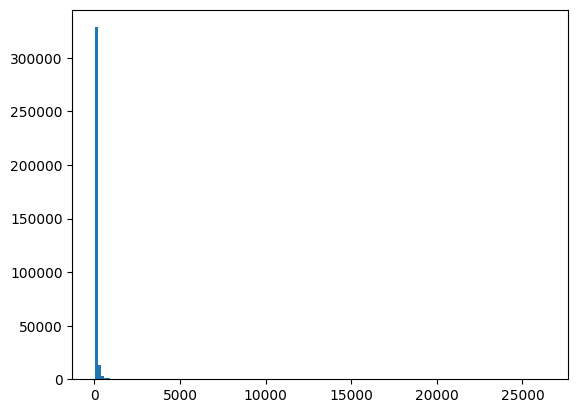

In [42]:
plt.hist(top20['citing'],bins=150)
plt.show()

In [46]:
cites4 = cites2.drop_duplicates(subset=['citing','cited'],keep='first')

In [47]:
len(cites4)

35212334

In [48]:
cits_counts4 = cites4.groupby(['cited']).agg({'citing':'count'}).reset_index()

In [49]:
cits_counts4.sort_values(by='citing', ascending=False)

,cited,citing
2591179,10.1023/b:visi.0000029664.99615.94,13187
2182854,10.1016/s0019-9958(65)90241-x,13140
2408253,10.1017/cbo9780511804441,11158
2565327,10.1023/a:1010933404324,9883
30322,10.1002/0471200611,6881
...,...,...
2967787,10.1073/pnas.1200603109,1
2967790,10.1073/pnas.1200677109,1
2967792,10.1073/pnas.120069197,1
2967793,10.1073/pnas.1200697109,1


In [64]:
top20 = cits_counts4[cits_counts4['citing'] >= cits_counts4['citing'].quantile(0.95)]

In [65]:
top20.sort_values(by='citing',ascending=False)

,cited,citing
2591179,10.1023/b:visi.0000029664.99615.94,13187
2182854,10.1016/s0019-9958(65)90241-x,13140
2408253,10.1017/cbo9780511804441,11158
2565327,10.1023/a:1010933404324,9883
30322,10.1002/0471200611,6881
...,...,...
4389573,10.1109/lsp.2012.2220349,18
143145,10.1002/j.1538-7305.1971.tb02591.x,18
671067,10.1007/bf00406415,18
4389682,10.1109/lsp.2013.2245503,18


In [66]:
top5percn = aminer[aminer['doi'].isin(top20['cited'].values)]

In [67]:
len(top5percn)/len(aminer)

0.0662083804252986

In [68]:
len(top5percn)

184998

In [69]:
cites4.to_csv("preprocessed_data/oc_yrcleaned.csv")

In [78]:
top5percn = top5percn[top5percn['year']>=1950]

In [80]:
len(top5percn)/len(aminer)

0.0662044436682273

In [79]:
top5percn.to_csv("preprocessed_data/top5percn_cited_aminer.csv")